In [1]:
# Script to summarize hourly flow data when siphon is on

In [9]:
import pandas as pd
import numpy as np
from pathlib import Path
from datetime import datetime
import os.path
import matplotlib.pyplot as plt

In [45]:
indata = os.path.join( os.getcwd(), '..', 'DataValues_Reviewed_Filled_HourlyMean.csv' )
outdata = os.path.join( os.getcwd(), '..', 'summary_MeanGPM.csv' )

In [46]:
df = pd.read_csv(indata)
df.head()

,DateTimeUTC,SiteCode,MethodCode,UTCOffset,QualityControlLevelCode,DataValue,QualifierCode,LocalDateTime,SourceCode,CensorCode,VariableCode
0,2018-01-01 08:00:00,Siphon11,IS203_EM,-8.0,1,0.0,3,2018-01-01 00:00:00,TNC,nc,GPM_60min
1,2018-01-01 09:00:00,Siphon11,IS203_EM,-8.0,1,0.0,3,2018-01-01 01:00:00,TNC,nc,GPM_60min
2,2018-01-01 10:00:00,Siphon11,IS203_EM,-8.0,1,0.0,3,2018-01-01 02:00:00,TNC,nc,GPM_60min
3,2018-01-01 11:00:00,Siphon11,IS203_EM,-8.0,1,0.0,3,2018-01-01 03:00:00,TNC,nc,GPM_60min
4,2018-01-01 12:00:00,Siphon11,IS203_EM,-8.0,1,0.0,3,2018-01-01 04:00:00,TNC,nc,GPM_60min


In [47]:
# Convert index to date index
df['LocalDateTime'] = pd.to_datetime(df['LocalDateTime'])
df.index = df['LocalDateTime']
del df['LocalDateTime']
df.head()

,DateTimeUTC,SiteCode,MethodCode,UTCOffset,QualityControlLevelCode,DataValue,QualifierCode,SourceCode,CensorCode,VariableCode
LocalDateTime,,,,,,,,,,
2018-01-01 00:00:00,2018-01-01 08:00:00,Siphon11,IS203_EM,-8.0,1,0.0,3,TNC,nc,GPM_60min
2018-01-01 01:00:00,2018-01-01 09:00:00,Siphon11,IS203_EM,-8.0,1,0.0,3,TNC,nc,GPM_60min
2018-01-01 02:00:00,2018-01-01 10:00:00,Siphon11,IS203_EM,-8.0,1,0.0,3,TNC,nc,GPM_60min
2018-01-01 03:00:00,2018-01-01 11:00:00,Siphon11,IS203_EM,-8.0,1,0.0,3,TNC,nc,GPM_60min
2018-01-01 04:00:00,2018-01-01 12:00:00,Siphon11,IS203_EM,-8.0,1,0.0,3,TNC,nc,GPM_60min


# Calculate hourly flow by siphon

<module 'matplotlib.pyplot' from 'C:\\Users\\kklausmeyer\\Miniconda3\\envs\\diversion\\lib\\site-packages\\matplotlib\\pyplot.py'>

<Figure size 2160x2160 with 0 Axes>

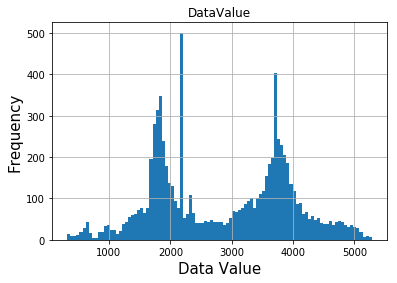

In [48]:
# Create histogram to check for low flow amounts
fig=plt.figure(figsize=(30,30))
df.loc[df['DataValue'] > 300].hist(column="DataValue", bins=100)
plt.xlabel("Data Value",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
#plt.xlim([0.0,100.0])
plt

In [49]:
# Remove low flow values

df = df.loc[df['DataValue'] > 300]

In [58]:
#Summarize by time step (hour, day, month)

df_siphon = df.groupby(['SiteCode','MethodCode']).mean()

In [59]:
df_siphon

UTCOffset  QualityControlLevelCode    DataValue  \
SiteCode MethodCode                                                    
Siphon11 IS203_EM    -7.000000                      1.0  3444.999375   
Siphon15 IS203_EM    -7.209799                      1.0  3944.606353   
Siphon30 IS203_EM    -7.189715                      1.0  2588.977208   
Siphon40 IS203_EM    -7.000000                      1.0  3452.434628   
Siphon7  AG3000_EM   -7.035109                      1.0  1901.939849   
         IS203_EM    -7.016030                      1.0  1883.068464   

                     QualifierCode  SiphonSize  
SiteCode MethodCode                             
Siphon11 IS203_EM         0.012438        16.0  
Siphon15 IS203_EM         0.012563        14.0  
Siphon30 IS203_EM         0.847288        14.0  
Siphon40 IS203_EM         0.124932        16.0  
Siphon7  AG3000_EM        0.000000        12.0  
         IS203_EM         0.055487        12.0

In [60]:
# Group by siphon size
df.loc[df['SiteCode'].isin(['Siphon11', 'Siphon40']), 'SiphonSize'] = 16
df.loc[df['SiteCode'].isin(['Siphon30', 'Siphon15']), 'SiphonSize'] = 14
df.loc[df['SiteCode'].isin(['Siphon7']), 'SiphonSize'] = 12

In [67]:
#Summarize by time step (hour, day, month)

df_ss = df.groupby(['SiphonSize','MethodCode']).mean()
df_ss = df_ss.reset_index()
df_ss

,SiphonSize,MethodCode,UTCOffset,QualityControlLevelCode,DataValue,QualifierCode
0,12.0,AG3000_EM,-7.035109,1.0,1901.939849,0.000000
1,12.0,IS203_EM,-7.016030,1.0,1883.068464,0.055487
2,14.0,IS203_EM,-7.193726,1.0,2859.762854,0.680552
3,16.0,IS203_EM,-7.000000,1.0,3450.174536,0.090737


In [68]:
# Drop siphon 7 with the IS 203 meter
df_ss = df_ss.drop([1])

In [69]:
df_ss = df_ss[['SiphonSize', 'DataValue']]

In [70]:
df_ss.rename(columns={'SiphonSize': 'Siphon Diameter (inches)', 'DataValue': 'Average 2018 Flow (gallons per minute)'}, inplace=True)

In [71]:
df_ss

,Siphon Diameter (inches),Average 2018 Flow (gallons per minute)
0,12.0,1901.939849
2,14.0,2859.762854
3,16.0,3450.174536


In [72]:
df_ss["Average 2018 Flow (gallons per day)"] = df_ss["Average 2018 Flow (gallons per minute)"] * 60 * 24
df_ss["Average 2018 Flow (acre feet per day)"] = df_ss["Average 2018 Flow (gallons per day)"] / 325851
df_ss

,Siphon Diameter (inches),Average 2018 Flow (gallons per minute),Average 2018 Flow (gallons per day),Average 2018 Flow (acre feet per day)
0,12.0,1901.939849,2.738793e+06,8.405048
2,14.0,2859.762854,4.118059e+06,12.637858
3,16.0,3450.174536,4.968251e+06,15.247003


In [73]:
# Export the reviewed data
df_ss.to_csv(outdata, encoding='utf-8',index=False)